In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pandas as pd
import pickle as pkl
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def year_binner(year,val=10):
    return year - year%val

In [5]:
context_df=pd.read_pickle('/data/dharp/compounds/datasets/contexts/contexts.pkl')
context_df

,context,year,count
0,"""_PROPN",1969,4
1,"""_PROPN",1970,13
2,"""_PROPN",1971,2
3,"""_PROPN",1972,9
4,"""_PROPN",1975,7
...,...,...,...
79767104,😊_ADJ,2019,20
79767105,😊_NOUN,2016,5
79767106,😊_NOUN,2017,20
79767107,😊_NOUN,2018,21


In [6]:
context_df['decade']=year_binner(context_df['year'].values,10)

In [7]:
decade_df=context_df.groupby(['decade'])['count'].sum().to_frame().reset_index()

In [8]:
decade_df.set_index('decade',inplace=True)
decade_df

,count
decade,
1470,87073
1480,157091
1490,56273
1500,530346
1510,3411
1520,37083
1530,75382
1540,96845
1550,91428


In [9]:
decade_df['count_per']=decade_df['count']/decade_df['count'].sum()*100
decade_df

,count,count_per
decade,,
1470,87073,0.000078
1480,157091,0.000140
1490,56273,0.000050
1500,530346,0.000473
1510,3411,0.000003
1520,37083,0.000033
1530,75382,0.000067
1540,96845,0.000086
1550,91428,0.000082


In [10]:
decade_df.loc[decade_df.index<1800]['count_per'].sum()

0.04238064703548176

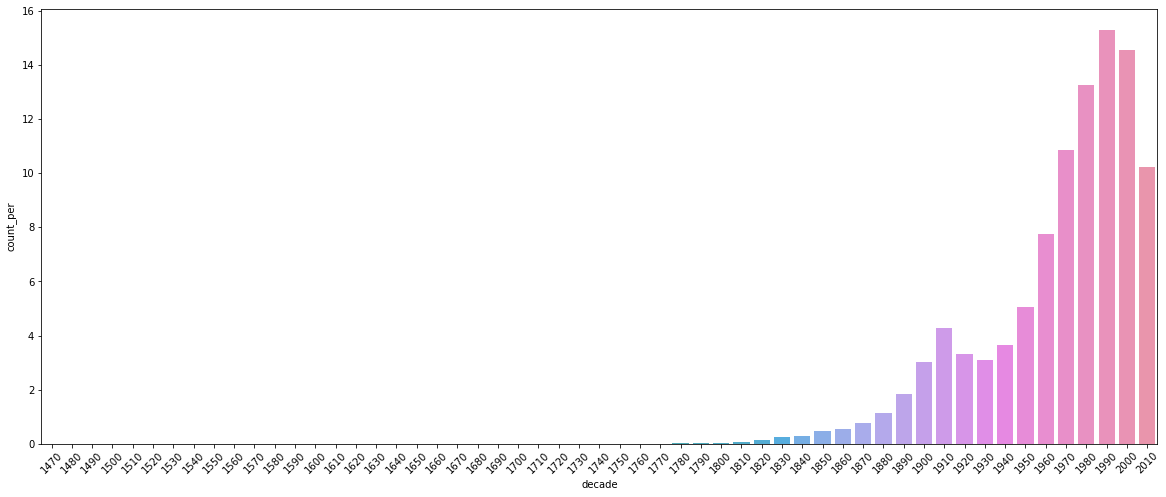

In [11]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x=decade_df.index, y="count_per", data=decade_df)
_=ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

In [12]:
context_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79767109 entries, 0 to 79767108
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   context  object
 1   year     uint64
 2   count    int64 
 3   decade   uint64
dtypes: int64(1), object(1), uint64(2)
memory usage: 2.4+ GB


In [13]:
context_df=context_df.loc[context_df['year']>=1800]
context_df

,context,year,count,decade
0,"""_PROPN",1969,4,1960
1,"""_PROPN",1970,13,1970
2,"""_PROPN",1971,2,1970
3,"""_PROPN",1972,9,1970
4,"""_PROPN",1975,7,1970
...,...,...,...,...
79767104,😊_ADJ,2019,20,2010
79767105,😊_NOUN,2016,5,2010
79767106,😊_NOUN,2017,20,2010
79767107,😊_NOUN,2018,21,2010


In [14]:
year_counts_df=context_df.groupby(['year'])['count'].sum().to_frame().reset_index()
year_counts_df['count_per']=year_counts_df['count']/year_counts_df['count'].sum()*100
year_counts_df

,year,count,count_per
0,1800,3109378,0.002777
1,1801,3146417,0.002810
2,1802,2601359,0.002323
3,1803,5004662,0.004470
4,1804,3081974,0.002753
...,...,...,...
215,2015,1014679053,0.906254
216,2016,1041408305,0.930127
217,2017,973285732,0.869284
218,2018,1178832910,1.052867


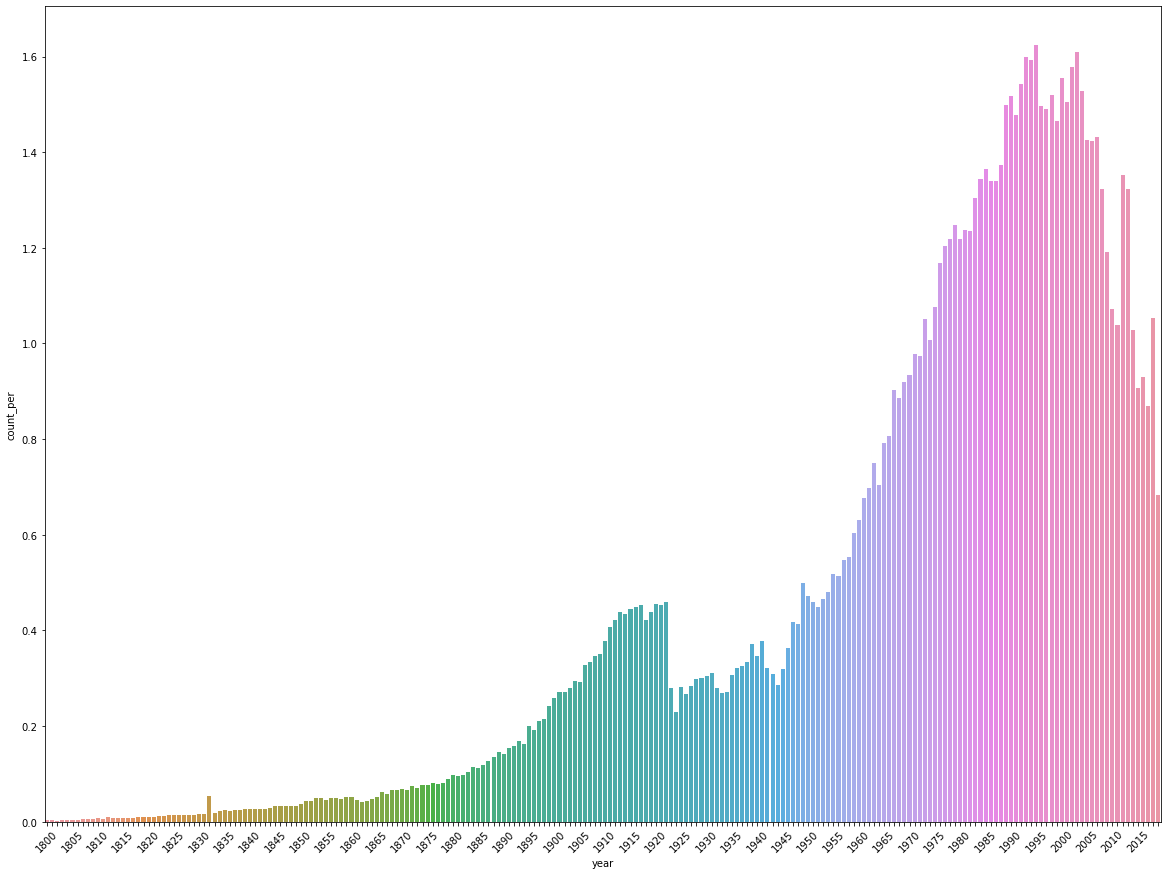

In [15]:
plt.figure(figsize = (20,15))
ax = sns.barplot(x='year', y="count_per", data=year_counts_df)
_=ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
n = 5  # Keeps every 7th label
_=[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

In [16]:
presence_df=context_df.groupby(['context','year']).size().to_frame().reset_index().context.value_counts().to_frame()
total_list=presence_df.loc[presence_df.context==220].index.to_list()
len(total_list)

16886

In [17]:
content_words_df=context_df.groupby(['context'])['count'].sum().to_frame().reset_index()
content_words_df

,context,count
0,"""_PROPN",127
1,#_ADJ,80
2,#_ADV,16608
3,#_NOUN,45757234
4,#_PROPN,50494
...,...,...
1575984,_NOUN,377
1575985,﹑_NOUN,442
1575986,﹑_PROPN,2088
1575987,😊_ADJ,112


In [18]:
context_top_50k=content_words_df.sort_values(by='count',ascending=False).head(50_000)['context'].to_list()
len(context_top_50k)

50000

In [25]:
to_save_context=list(set(context_top_50k).union(total_list))
len(to_save_context)

53207

In [20]:
plot_df=context_df.loc[context_df.context.isin(to_save_context)].groupby(['year'])['count'].sum().to_frame().reset_index()
plot_df=plot_df.set_index('year')/year_counts_df.set_index('year')*100
plot_df

,count,count_per
year,,
1800,95.904486,NaN
1801,96.766068,NaN
1802,96.775224,NaN
1803,96.524041,NaN
1804,96.394259,NaN
...,...,...
2015,96.078740,NaN
2016,96.024688,NaN
2017,95.735387,NaN


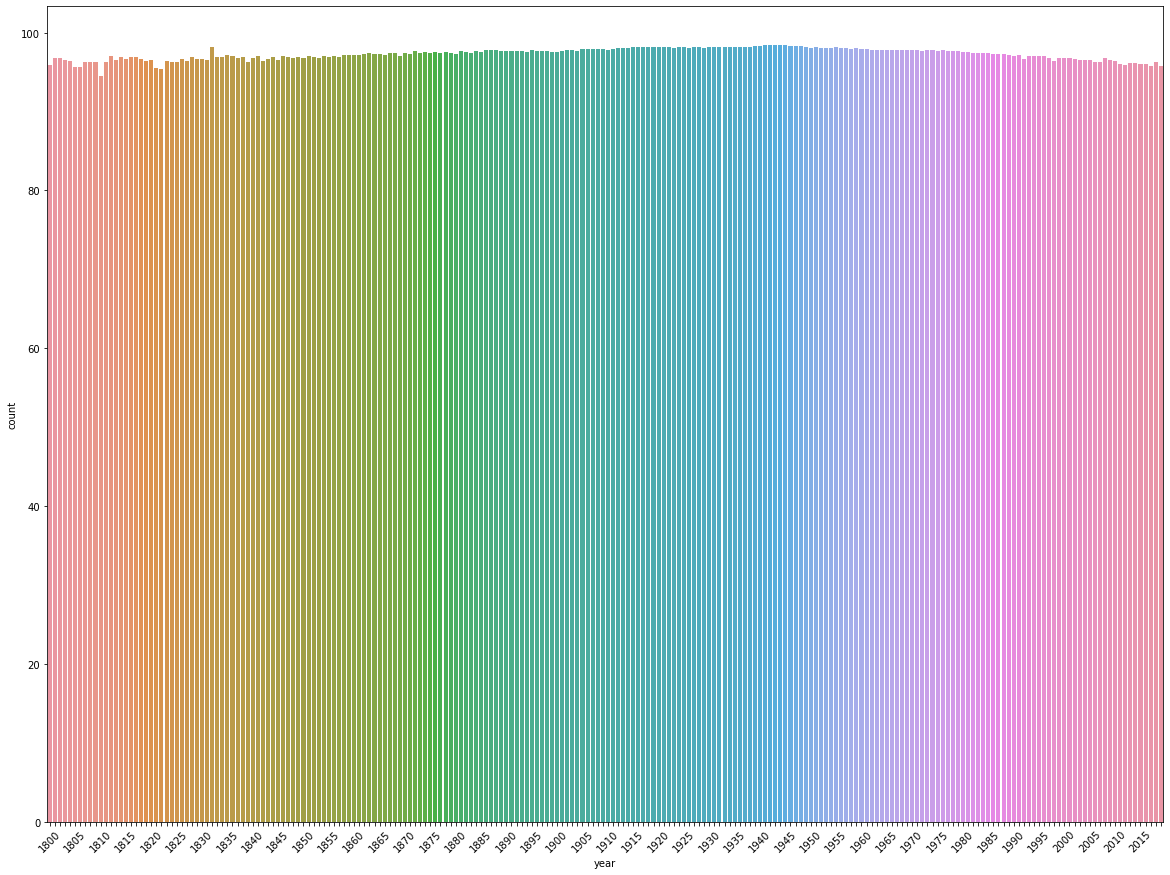

In [21]:
plt.figure(figsize = (20,15))
ax = sns.barplot(x=plot_df.index, y="count", data=plot_df)
_=ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
n = 5  # Keeps every 7th label
_=[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

In [22]:
plot_df=context_df.loc[context_df.context.isin(to_save_context)]['year'].value_counts().to_frame()
plot_df=plot_df/context_df['year'].value_counts().to_frame()*100
plot_df.columns=['types_per']
plot_df

,types_per
1800,43.966976
1801,53.813513
1802,53.793905
1803,47.614843
1804,50.426002
...,...
2015,7.142819
2016,7.111419
2017,7.158633
2018,7.112690


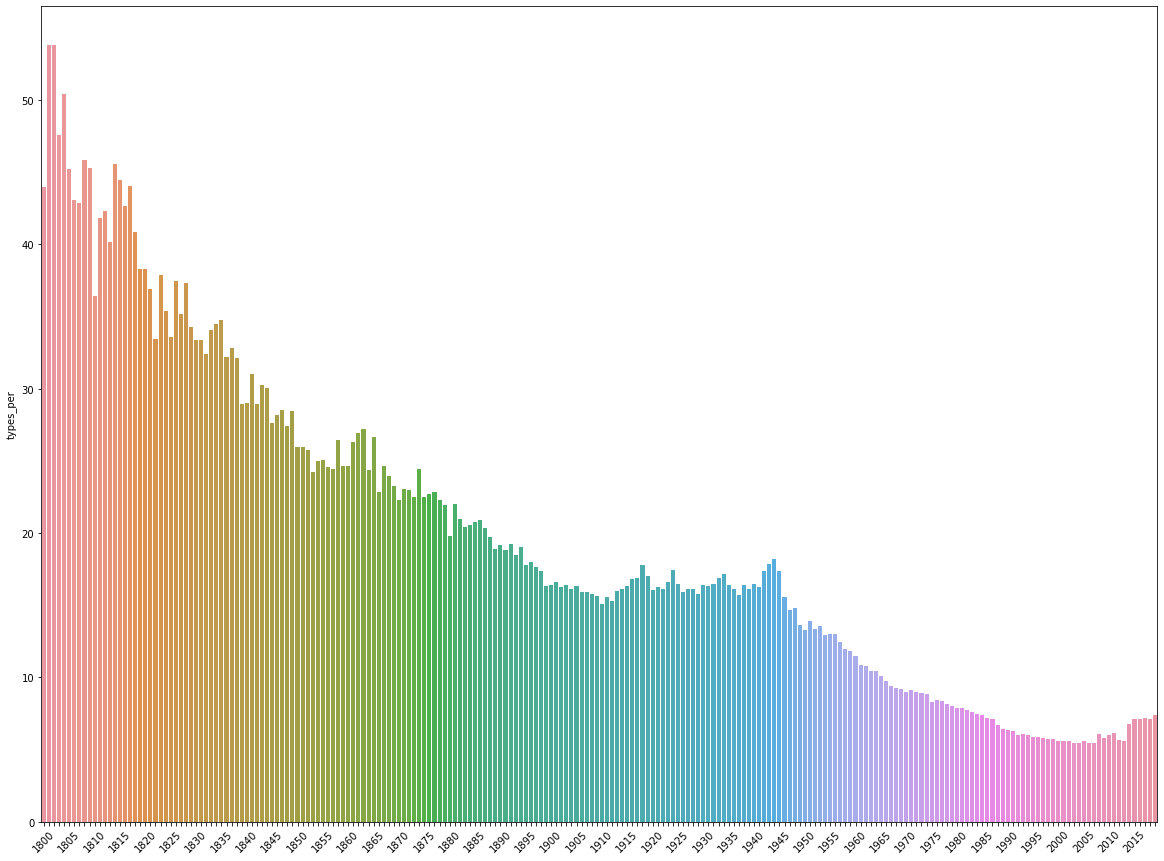

In [23]:
plt.figure(figsize = (20,15))
ax = sns.barplot(x=plot_df.index, y="types_per", data=plot_df)
_=ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
n = 5 
_=[lab.set_visible(False) for (i,lab) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

In [24]:
context_df.loc[context_df.context.isin(to_save_context)]['year'].value_counts().to_frame()

,year
2000,53128
2003,53123
1998,53122
1997,53120
1999,53120
...,...
1803,25343
1805,24787
1801,24730
1804,23970


In [26]:
with open('../datasets/contexts/contexts_top50k.pkl', 'wb') as f:
    pkl.dump(to_save_context, f)